In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cwt-dataset/Dataset/R/R_CWT_912.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1093.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1612.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1652.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1680.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_570.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1664.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1551.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_789.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_247.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1902.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_225.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_183.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1739.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1164.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1880.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_562.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1473.png
/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1533.png
/kaggle/input/cwt-dataset/Dataset/R/R_

In [7]:
folder_path = "/kaggle/input/cwt-dataset/Dataset/R"
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  # Add more extensions if needed

# Get the list of all files in the folder
all_files = os.listdir(folder_path)

# Filter out only the image files
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]

# Count the number of images
num_images = len(image_files)

print(f"Number of images in {folder_path}: {num_images}")

Number of images in /kaggle/input/cwt-dataset/Dataset/R: 1995


In [8]:
folder_path = "/kaggle/input/cwt-dataset/Dataset/NR"
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  # Add more extensions if needed

# Get the list of all files in the folder
all_files = os.listdir(folder_path)

# Filter out only the image files
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]

# Count the number of images
num_images = len(image_files)

print(f"Number of images in {folder_path}: {num_images}")

Number of images in /kaggle/input/cwt-dataset/Dataset/NR: 3059


In [9]:
Responders = 1995
Non_Responders = 3059

Total_Dataset_images  = Responders+Non_Responders
print("Total Number of images",Total_Dataset_images)

Total Number of images 5054


In [10]:
import os
import pandas as pd

# Define the base path
base_path = "/kaggle/input/cwt-dataset/Dataset"

# Initialize lists to store paths and labels
paths = []
labels = []

# Traverse through the folders and collect paths and labels
for folder in ["R", "NR"]:
    folder_path = os.path.join(base_path, folder)
    
    # Iterate through files in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        
        # Append path and label to the lists
        paths.append(file_path)
        labels.append(folder)

# Create a DataFrame
df = pd.DataFrame({"path": paths, "label": labels})

# Display the DataFrame
df


,path,label
0,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_912.png,R
1,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1093...,R
2,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1612...,R
3,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1652...,R
4,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1680...,R
...,...,...
5049,/kaggle/input/cwt-dataset/Dataset/NR/NR_CWT_26...,NR
5050,/kaggle/input/cwt-dataset/Dataset/NR/NR_CWT_29...,NR
5051,/kaggle/input/cwt-dataset/Dataset/NR/NR_CWT_21...,NR
5052,/kaggle/input/cwt-dataset/Dataset/NR/NR_CWT_11...,NR


In [11]:
df["label"].value_counts()

label
NR    3059
R     1995
Name: count, dtype: int64

In [12]:
df.to_csv("EEG_Scalagram_Dataset.csv", index=False)

In [13]:
df = pd.read_csv("EEG_Scalagram_Dataset.csv")
df.head()

,path,label
0,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_912.png,R
1,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1093...,R
2,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1612...,R
3,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1652...,R
4,/kaggle/input/cwt-dataset/Dataset/R/R_CWT_1680...,R


In [14]:
df["label"].value_counts()

label
NR    3059
R     1995
Name: count, dtype: int64

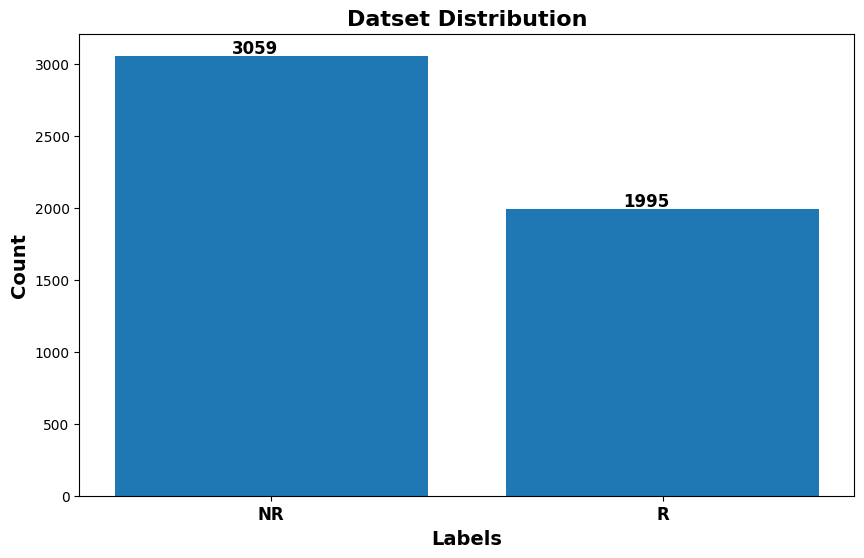

In [15]:
import matplotlib.pyplot as plt


label_counts = df["label"].value_counts()

# Plotting the bar plot with count representation
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = plt.bar(label_counts.index, label_counts.values, linewidth=1.5)

# Customize x-label and y-label size
plt.xlabel('Labels', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Customize x-tick labels size and make them bold
plt.xticks(fontsize=12, fontweight='bold')

# Increase space between bars and count numbers
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 15, str(count), fontsize=12, fontweight='bold')

# Add a border to the bars
for bar in bars:
    bar.set_linewidth(1.5)

# Title of the plot
plt.title('Datset Distribution', fontsize=16, fontweight='bold')

# Show the plot
plt.show()


## Splitting Training and Testing

In [16]:
#test
# Non_Responders
print(round(3059*.10))
# Responders
print(round(1995*.10))

#Tota
print(306+200)


306
200
506


In [18]:
from sklearn.model_selection import train_test_split

# Calculate the number of images for each class in the test set
test_size_percent = 0.1
num_responders_test = round(2166 * test_size_percent)  # Round to the nearest integer
num_non_responders_test = round(3249 * test_size_percent)  # Round to the nearest integer

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=test_size_percent, stratify=df['label'], random_state=42)

# Displaying the shapes of the resulting DataFrames
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

# Print the number of images in each class for the test set
print("Number of Responders in Test Set:", num_responders_test)
print("Number of Non_Responders in Test Set:", num_non_responders_test)


Train set shape: (4548, 2)
Test set shape: (506, 2)
Number of Responders in Test Set: 217
Number of Non_Responders in Test Set: 325


## Splitting Training and Validation

In [21]:
from sklearn.model_selection import StratifiedKFold

# Set up StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store training and validation sets
fold_train_dfs = []
fold_val_dfs = []

# Split the training set into 5 folds
for train_index, val_index in skf.split(train_df['path'], train_df['label']):
    train_fold = train_df.iloc[train_index]
    val_fold = train_df.iloc[val_index]
    
    # Append to the lists
    fold_train_dfs.append(train_fold)
    fold_val_dfs.append(val_fold)

# Print the number of images in each class for each fold
for fold, (train_fold, val_fold) in enumerate(zip(fold_train_dfs, fold_val_dfs), 1):
    print(f"Fold {fold} - Training Set Class Distribution:")
    print(train_fold['label'].value_counts())
    print(f"\nFold {fold} - Validation Set Class Distribution:")
    print(val_fold['label'].value_counts())
    print("\n" + "-"*40)


Fold 1 - Training Set Class Distribution:
label
NR    2202
R     1436
Name: count, dtype: int64

Fold 1 - Validation Set Class Distribution:
label
NR    551
R     359
Name: count, dtype: int64

----------------------------------------
Fold 2 - Training Set Class Distribution:
label
NR    2202
R     1436
Name: count, dtype: int64

Fold 2 - Validation Set Class Distribution:
label
NR    551
R     359
Name: count, dtype: int64

----------------------------------------
Fold 3 - Training Set Class Distribution:
label
NR    2202
R     1436
Name: count, dtype: int64

Fold 3 - Validation Set Class Distribution:
label
NR    551
R     359
Name: count, dtype: int64

----------------------------------------
Fold 4 - Training Set Class Distribution:
label
NR    2203
R     1436
Name: count, dtype: int64

Fold 4 - Validation Set Class Distribution:
label
NR    550
R     359
Name: count, dtype: int64

----------------------------------------
Fold 5 - Training Set Class Distribution:
label
NR    2203
R

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [27]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras import regularizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def cnn_model():
    model = Sequential()
    
    model.add(Conv2D(4, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    

    model.add(Conv2D(6, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    

    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    

    model.add(Conv2D(12, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    

    model.add(Flatten())
    
    model.add(Dropout(0.25))

    model.add(Dense(1, activation='sigmoid'))
   
    # Compile the model with the specified learning rate
    learning_rate = 0.0001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Build the model
    model.build((None, 224, 224, 3))
    
    return model


In [29]:
# Create model
model = cnn_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 4)    │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 6)    │           222 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 220, 220, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 218, 218, 8)    │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 218, 218, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 216, 216, 12)   │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 216, 216, 12)   │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 559872)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 559872)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       559,873 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561,643 (2.14 MB)

 Trainable params: 561,583 (2.14 MB)

 Non-trainable params: 60 (240.00 B)

In [31]:
# Initialize EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Fold 1
Start Time: 2024-03-04 19:17:03
Found 3638 validated image filenames belonging to 2 classes.
train_generator classes {'NR': 0, 'R': 1}
Found 910 validated image filenames belonging to 2 classes.
val_generator classes {'NR': 0, 'R': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/114 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.4375 - loss: 1.1716  

I0000 00:00:1709579849.475099     192 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


114/114 ━━━━━━━━━━━━━━━━━━━━ 115s 827ms/step - accuracy: 0.6543 - loss: 0.7994 - val_accuracy: 0.3945 - val_loss: 0.8030
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 553ms/step - accuracy: 0.9296 - loss: 0.1629 - val_accuracy: 0.3945 - val_loss: 0.8786
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 552ms/step - accuracy: 0.9714 - loss: 0.0798 - val_accuracy: 0.6231 - val_loss: 0.6181
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 549ms/step - accuracy: 0.9899 - loss: 0.0338 - val_accuracy: 0.8264 - val_loss: 0.4541
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 553ms/step - accuracy: 0.9924 - loss: 0.0264 - val_accuracy: 0.8714 - val_loss: 0.3233
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 65s 545ms/step - accuracy: 0.9971 - loss: 0.0177 - val_accuracy: 0.8912 - val_loss: 0.2987
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 548ms/step - accuracy: 0.9973 - loss: 0.0152 - val_accuracy: 0.8824 - val_loss: 0.3644
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 548ms/step - accuracy: 0.9960 - loss: 0.0149 - va

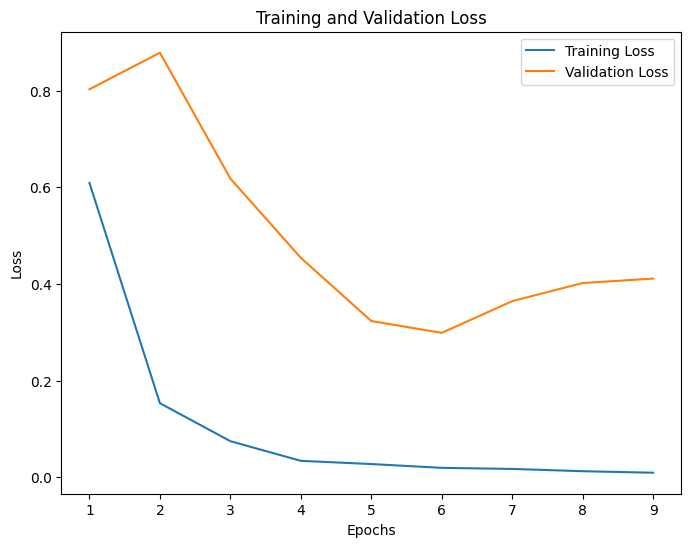

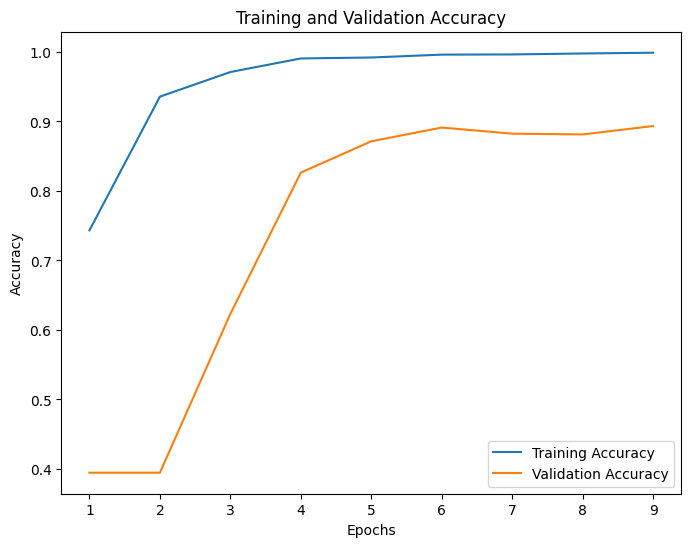

Fold 2
Start Time: 2024-03-04 19:27:49
Found 3638 validated image filenames belonging to 2 classes.
train_generator classes {'NR': 0, 'R': 1}
Found 910 validated image filenames belonging to 2 classes.
val_generator classes {'NR': 0, 'R': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 548ms/step - accuracy: 0.9552 - loss: 0.1518 - val_accuracy: 0.9769 - val_loss: 0.0647
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 553ms/step - accuracy: 0.9750 - loss: 0.0772 - val_accuracy: 0.9824 - val_loss: 0.0511
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 547ms/step - accuracy: 0.9876 - loss: 0.0317 - val_accuracy: 0.9747 - val_loss: 0.0656
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 65s 546ms/step - accuracy: 0.9983 - loss: 0.0105 - val_accuracy: 0.9835 - val_loss: 0.0438
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 547ms/step - accuracy: 0.9977 - loss: 0.0105 - val_accuracy: 0.9846 - val_loss: 0.0422
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 551ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9802 - val_loss: 0.0486
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 550ms/step - accuracy: 0.9984 - loss: 0.0071 - val_accuracy: 0.9824 - val_loss: 0.0443
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 546ms/step - accuracy: 1.0000 - loss: 0.0040 - val

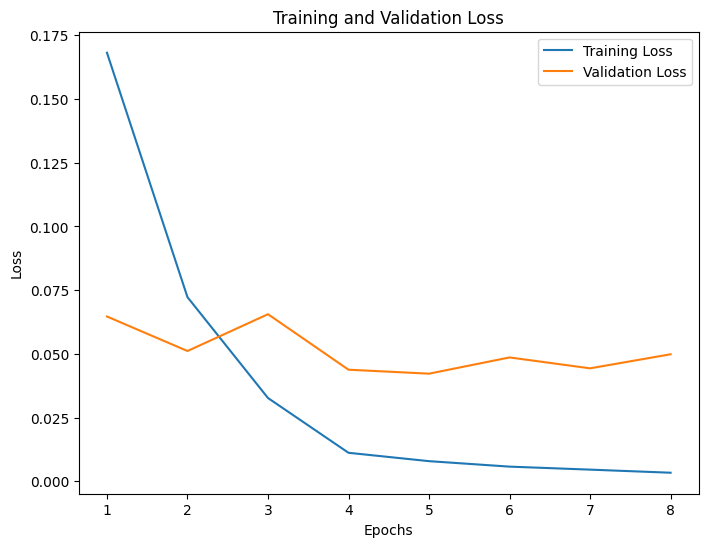

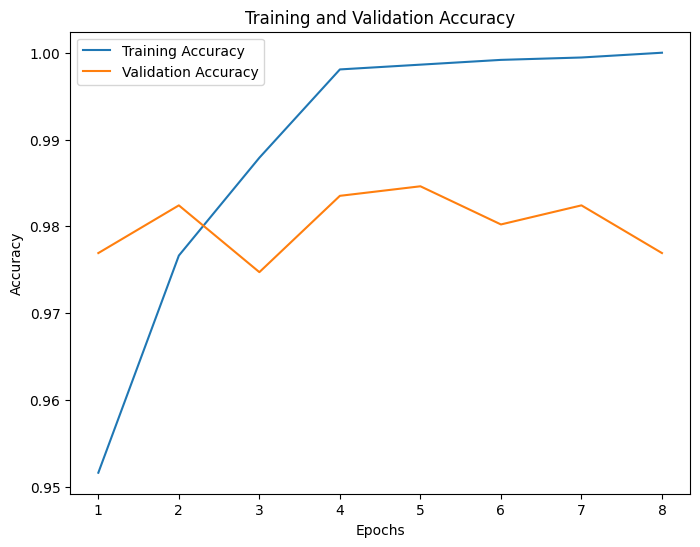

Fold 3
Start Time: 2024-03-04 19:36:37
Found 3638 validated image filenames belonging to 2 classes.
train_generator classes {'NR': 0, 'R': 1}
Found 910 validated image filenames belonging to 2 classes.
val_generator classes {'NR': 0, 'R': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 553ms/step - accuracy: 0.9923 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 549ms/step - accuracy: 0.9932 - loss: 0.0212 - val_accuracy: 0.9956 - val_loss: 0.0216
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 555ms/step - accuracy: 0.9959 - loss: 0.0102 - val_accuracy: 0.9978 - val_loss: 0.0095
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 549ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9967 - val_loss: 0.0097
End Time: 2024-03-04 19:41:02
Elapsed Time for Fold 3: 265.04 seconds

Training Loss: [0.03221886232495308, 0.022731395438313484, 0.009200213477015495, 0.0037111809942871332]
Validation Loss: [0.009346314705908298, 0.02159859985113144, 0.00948479026556015, 0.009656053967773914]
Training Accuracy: [0.9895547032356262, 0.9939526915550232, 0.9967014789581299, 0.9994502663612366]
Validation Accuracy: [1.0, 0.995604395866394, 0.997802197933197, 0.9967032670974731]


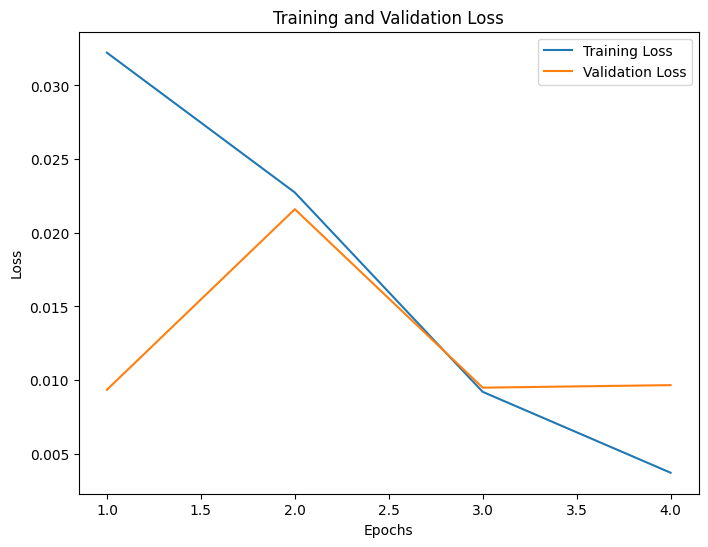

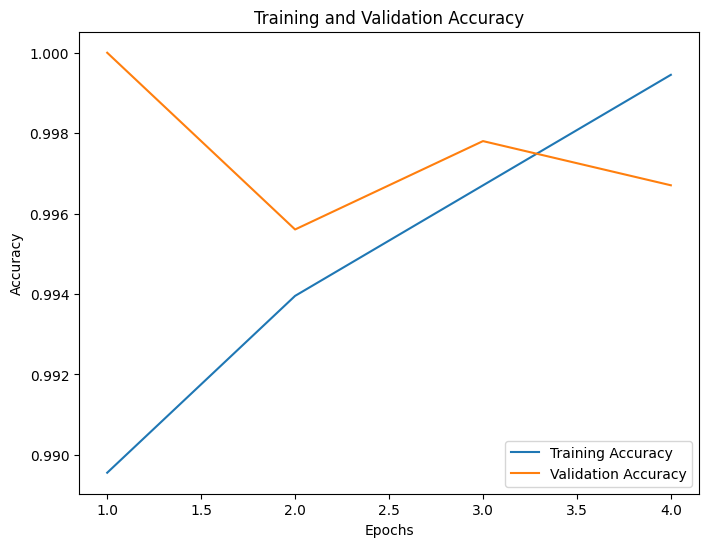

Fold 4
Start Time: 2024-03-04 19:41:02
Found 3639 validated image filenames belonging to 2 classes.
train_generator classes {'NR': 0, 'R': 1}
Found 909 validated image filenames belonging to 2 classes.
val_generator classes {'NR': 0, 'R': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 79s 670ms/step - accuracy: 0.9963 - loss: 0.0125 - val_accuracy: 0.9912 - val_loss: 0.0246
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 555ms/step - accuracy: 0.9909 - loss: 0.0236 - val_accuracy: 0.9967 - val_loss: 0.0217
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 67s 554ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9945 - val_loss: 0.0159
End Time: 2024-03-04 19:44:36
Elapsed Time for Fold 4: 213.29 seconds

Training Loss: [0.019270174205303192, 0.02123604342341423, 0.008538098074495792]
Validation Loss: [0.024637345224618912, 0.021748656406998634, 0.015942353755235672]
Training Accuracy: [0.9942291975021362, 0.9920307993888855, 0.9975267648696899]
Validation Accuracy: [0.9911991357803345, 0.9966996908187866, 0.9944994449615479]


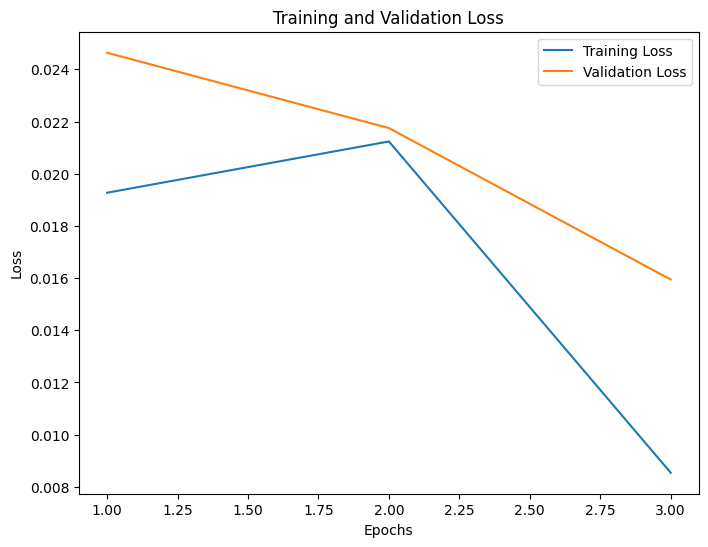

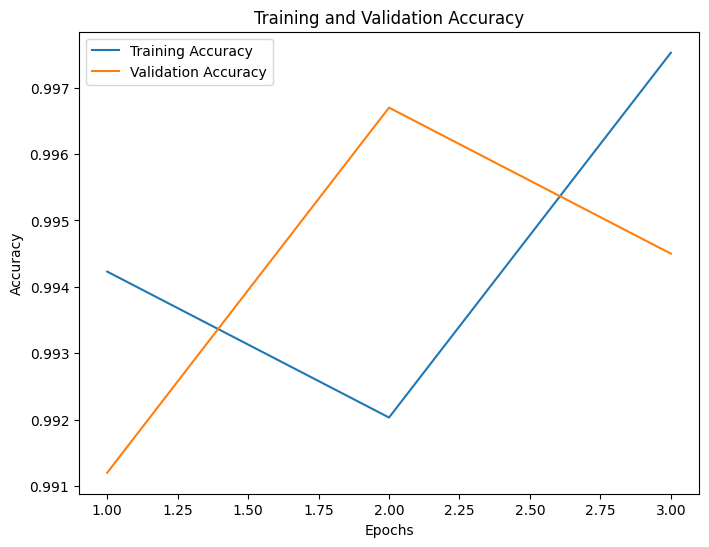

Fold 5
Start Time: 2024-03-04 19:44:36
Found 3639 validated image filenames belonging to 2 classes.
train_generator classes {'NR': 0, 'R': 1}
Found 909 validated image filenames belonging to 2 classes.
val_generator classes {'NR': 0, 'R': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 67s 560ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9901 - val_loss: 0.0282
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 548ms/step - accuracy: 0.9920 - loss: 0.0198 - val_accuracy: 0.9912 - val_loss: 0.0244
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 66s 551ms/step - accuracy: 0.9945 - loss: 0.0203 - val_accuracy: 0.9879 - val_loss: 0.0239
End Time: 2024-03-04 19:47:56
Elapsed Time for Fold 5: 199.72 seconds

Training Loss: [0.024946648627519608, 0.01758631505072117, 0.015928009524941444]
Validation Loss: [0.028224250301718712, 0.024389522150158882, 0.02387208864092827]
Training Accuracy: [0.9917559623718262, 0.9925803542137146, 0.9950535893440247]
Validation Accuracy: [0.9900990128517151, 0.9911991357803345, 0.9878987669944763]


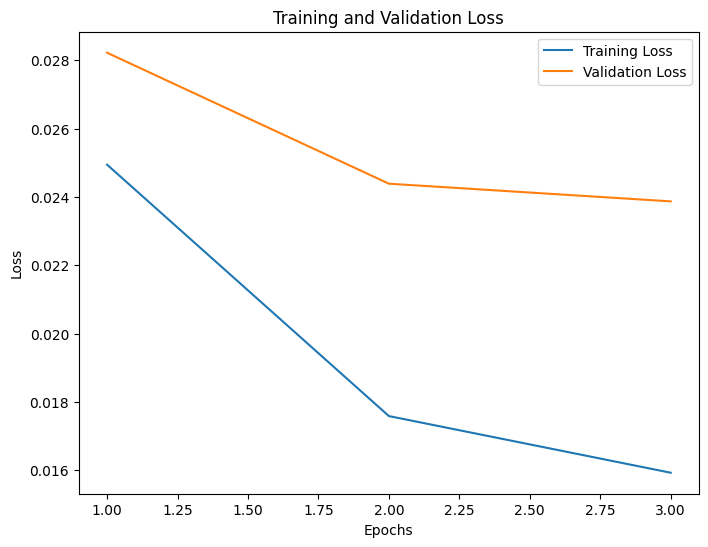

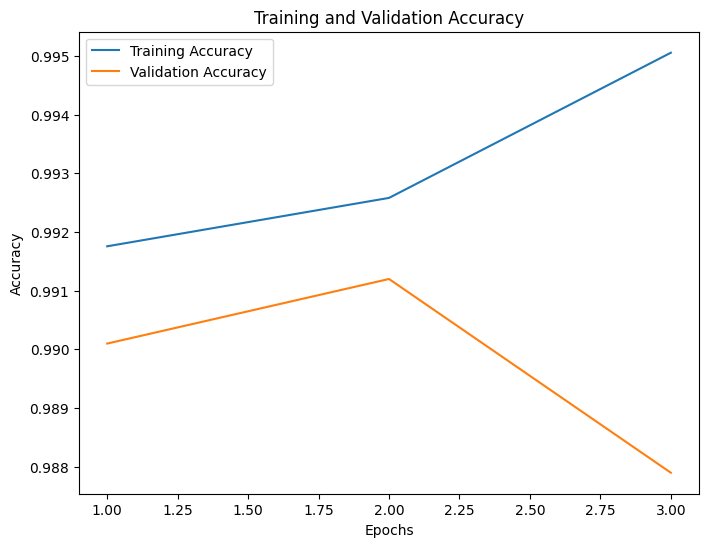

Total Training Time: 1849.95 seconds


In [32]:
import time
import matplotlib.pyplot as plt

# Number of epochs and batch size
epochs = 10
batch_size = 32

# Initialize lists to store loss and accuracy values
all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

# Initialize lists to store start and end times
all_start_times = []
all_end_times = []

# Loop through the folds and fit the model
for i in range(5):
    print("Fold", i + 1)

    # Record the start time for the current fold
    start_time = time.time()
    all_start_times.append(start_time)
    print("Start Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

    # Get the current fold's training and validation sets
    fold_train = fold_train_dfs[i]
    fold_val = fold_val_dfs[i]

    # Training generator
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=fold_train,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("train_generator classes", train_generator.class_indices)

    # Validation generator
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=fold_val,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("val_generator classes", val_generator.class_indices)

    # Fit the model on the current fold's training and validation data
    history = model.fit(
        train_generator,
        epochs=epochs,
        verbose=1,
        validation_data=val_generator,
        callbacks=[early_stop]
    )

    # Record the end time for the current fold
    end_time = time.time()
    all_end_times.append(end_time)
    print("End Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))

    # Calculate and print the elapsed time for the current fold
    elapsed_time = end_time - start_time
    print("Elapsed Time for Fold {}: {:.2f} seconds\n".format(i + 1, elapsed_time))

    # Print the training and validation loss and accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    print("Training Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)

    # Append the loss and accuracy values to the lists
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)
    all_train_acc.append(train_acc)
    all_val_acc.append(val_acc)

    # Plot the training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(history.epoch) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(history.epoch) + 1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Calculate and print the total training time
total_training_time = sum(all_end_times) - sum(all_start_times)
print("Total Training Time: {:.2f} seconds".format(total_training_time))


In [33]:
# Calculate and print the average loss and accuracy
avg_train_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_train_loss]
avg_val_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_val_loss]
avg_train_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_train_acc]
avg_val_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_val_acc]

print("Average Training Loss:", avg_train_loss)
print("Average Validation Loss:", avg_val_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Accuracy:", avg_val_acc)

Average Training Loss: [0.10622187538279428, 0.038220881135202944, 0.016965413058642298, 0.016348105234404404, 0.019486991067727406]
Average Validation Loss: [0.5059017207887437, 0.05125569552183151, 0.01252143969759345, 0.020776118462284405, 0.025495287030935287]
Average Training Accuracy: [0.9580050110816956, 0.9889362305402756, 0.994914785027504, 0.9945955872535706, 0.9931299686431885]
Average Validation Accuracy: [0.7398046321339078, 0.980219766497612, 0.997527465224266, 0.9941327571868896, 0.9897323052088419]


In [34]:
# Calculate and print the average loss and accuracy
mean_train_loss = sum(avg_train_loss) / len(avg_train_loss)
mean_val_loss = sum(avg_val_loss) / len(avg_val_loss)
mean_train_acc = sum(avg_train_acc) / len(avg_train_acc)
mean_val_acc = sum(avg_val_acc) / len(avg_val_acc)

print("Mean Training Loss:", mean_train_loss)
print("Mean Validation Loss:", mean_val_loss)
print("Mean Training Accuracy:", mean_train_acc)
print("Mean Validation Accuracy:", mean_val_acc)


Mean Training Loss: 0.039448653175754265
Mean Validation Loss: 0.12319005230027769
Mean Training Accuracy: 0.9859163165092468
Mean Validation Accuracy: 0.9402833852503034


In [35]:
import time

# Record start time
start_time = time.time()

# Setting the test set as the final evaluation set
evaluation_set = test_df

# Print the length of the evaluation set
print("Evaluation set length:", len(evaluation_set))

# Evaluate the model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='binary'
)
print("evaluation_generator classes", evaluation_generator.class_indices)

evaluation_loss, evaluation_accuracy = model.evaluate(evaluation_generator)

# Record end time
end_time = time.time()

# Calculate and print the time taken for evaluation
elapsed_time = end_time - start_time
print("Time taken for evaluation:", elapsed_time, "seconds")

print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Evaluation set length: 506
Found 506 validated image filenames belonging to 2 classes.
evaluation_generator classes {'NR': 0, 'R': 1}


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 745ms/step - accuracy: 0.8583 - loss: 0.5785
Time taken for evaluation: 13.108301877975464 seconds
Evaluation Loss: 0.4974520802497864
Evaluation Accuracy: 0.8774703741073608


In [36]:
# After training, save the model
model.save('CWT_CNN_ES_87.74.h5')
# print("Model saved successfully")

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
evaluation_pred_classes = (evaluation_predictions > 0.5).astype(int)

# Get true labels
true_labels = evaluation_generator.classes

# Class names
class_names = ['Non_Responders', 'Responders']

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, evaluation_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 458ms/step
Confusion Matrix:
[[273  33]
 [ 29 171]]
Classification Report:
                precision    recall  f1-score   support

Non_Responders       0.90      0.89      0.90       306
    Responders       0.84      0.85      0.85       200

      accuracy                           0.88       506
     macro avg       0.87      0.87      0.87       506
  weighted avg       0.88      0.88      0.88       506



In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
evaluation_pred_classes = (evaluation_predictions > 0.5).astype(int)  

# Get true labels
true_labels = evaluation_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, evaluation_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)



# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes)
print("Classification Report:")
print(class_report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 450ms/step
Confusion Matrix:
[[273  33]
 [ 29 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       306
           1       0.84      0.85      0.85       200

    accuracy                           0.88       506
   macro avg       0.87      0.87      0.87       506
weighted avg       0.88      0.88      0.88       506



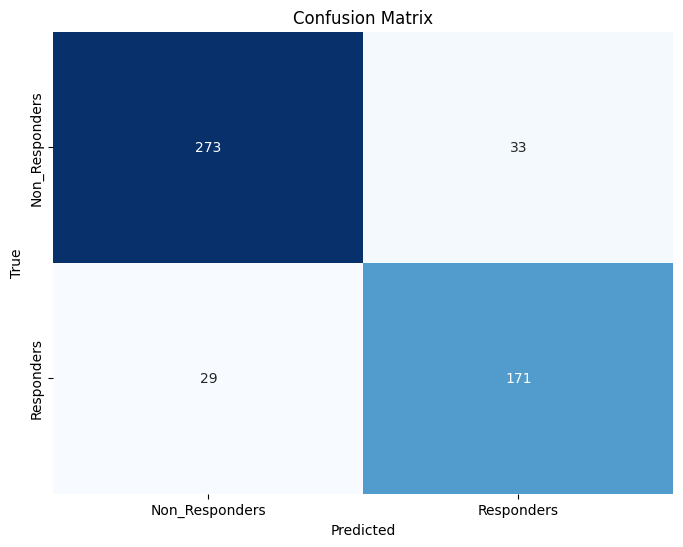

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       306
           1       0.84      0.85      0.85       200

    accuracy                           0.88       506
   macro avg       0.87      0.87      0.87       506
weighted avg       0.88      0.88      0.88       506



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you already have the confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']
plot_confusion_matrix(conf_matrix, class_names)


# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes)
print("Classification Report:")
print(class_report)


In [40]:
print(evaluation_generator.classes)

[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 

In [41]:
# Get true labels
true_labels = evaluation_generator.classes

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
predicted_labels = (evaluation_predictions > 0.5).astype(int)

# Initialize counters for correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0

# Iterate over all predictions
for i in range(len(true_labels)):
    if true_labels[i] == predicted_labels[i]:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / (correct_predictions + incorrect_predictions)

# Print the results
print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)
print("Accuracy:", accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 491ms/step
Correct Predictions: 444
Incorrect Predictions: 62
Accuracy: 0.8774703557312253


In [42]:
# confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']

# Print confusion matrix with counts
for i in range(len(class_names)):
    print(f"\nClass: {i} ({class_names[i]})")
    true_positives = conf_matrix[i, i]
    true_negatives = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives

    print(f"True Positives (TP): {true_positives}")
    print(f"True Negatives (TN): {true_negatives}")
    print(f"False Positives (FP): {false_positives}")
    print(f"False Negatives (FN): {false_negatives}")
    print("====================")

# calculate and print overall metrics
overall_accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



Class: 0 (Non_Responders)
True Positives (TP): 273
True Negatives (TN): 171
False Positives (FP): 29
False Negatives (FN): 33

Class: 1 (Responders)
True Positives (TP): 171
True Negatives (TN): 273
False Positives (FP): 33
False Negatives (FN): 29

Overall Metrics:
Overall Accuracy: 0.8774703557312253
Precision: [0.90397351 0.83823529]
Recall: [0.89215686 0.855     ]


In [43]:
# confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']

# Print class-specific metrics
for i in range(len(class_names)):
    precision = conf_matrix[i, i] / np.sum(conf_matrix[:, i]) if np.sum(conf_matrix[:, i]) != 0 else 0
    recall = conf_matrix[i, i] / np.sum(conf_matrix[i, :]) if np.sum(conf_matrix[i, :]) != 0 else 0
    specificity = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1)) / (np.sum(conf_matrix) - np.sum(conf_matrix[:, i]) - np.sum(conf_matrix[i, :]) + conf_matrix[i, i])
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f"\nClass: {class_names[i]}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print("====================")



Class: Non_Responders
Precision: 0.9040
Recall: 0.8922
Specificity: 1.0000
F1-score: 0.8980

Class: Responders
Precision: 0.8382
Recall: 0.8550
Specificity: 1.0000
F1-score: 0.8465


In [44]:
# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       306
           1       0.84      0.85      0.85       200

    accuracy                           0.88       506
   macro avg       0.87      0.87      0.87       506
weighted avg       0.88      0.88      0.88       506



16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 453ms/step


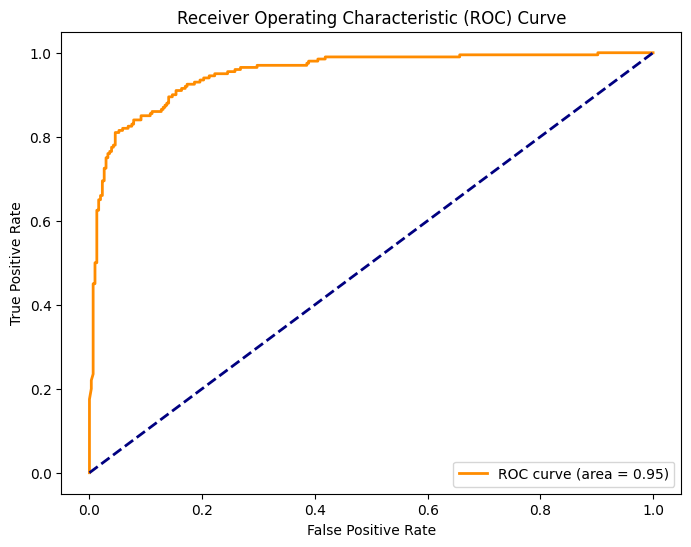

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# true labels and predicted probabilities
true_labels = evaluation_generator.classes
predicted_probabilities = model.predict(evaluation_generator)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 450ms/step


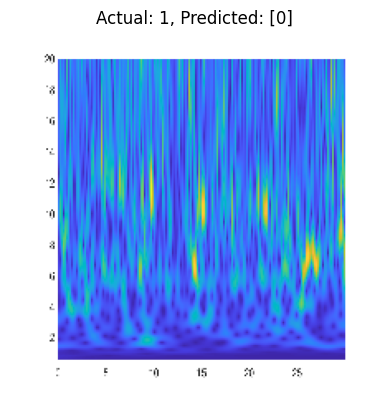

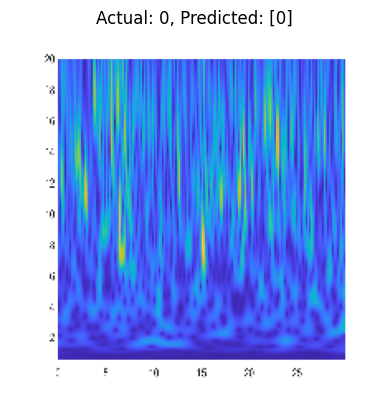

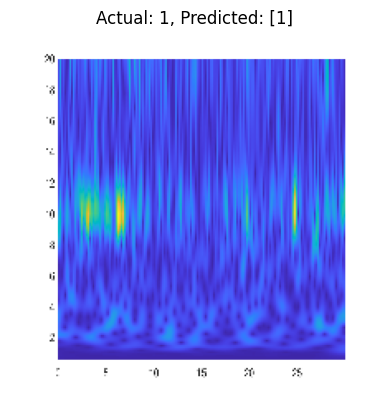

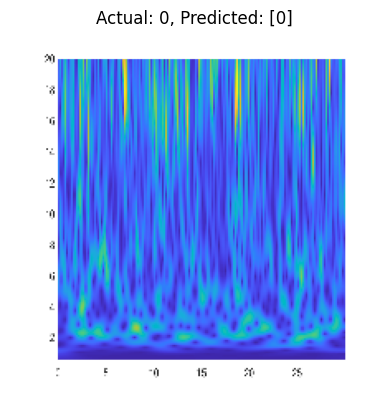

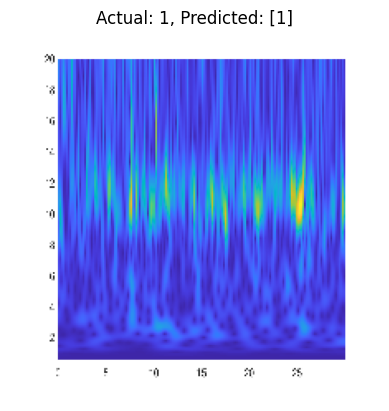

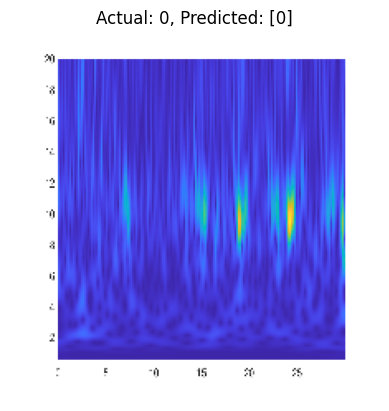

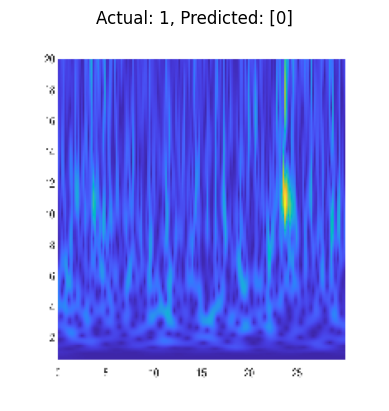

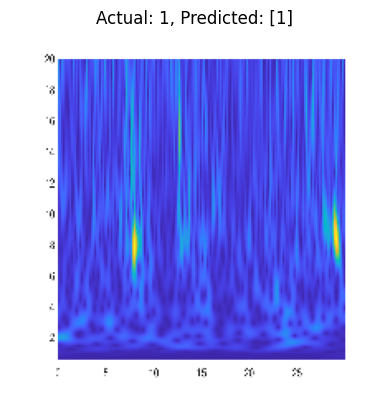

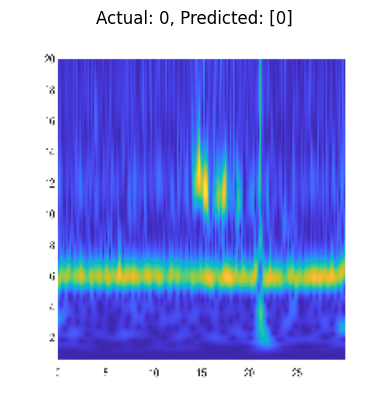

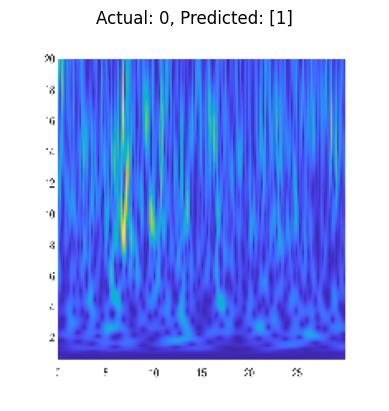

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image

# Placeholder function for loading and preprocessing images
def load_and_preprocess_image(image_path):
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array


# Get true labels
true_labels = evaluation_generator.classes

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
predicted_labels = (evaluation_predictions > 0.5).astype(int)

# Display images along with actual and predicted labels
for i in range(len(true_labels[:10])):
    image_path = evaluation_set['path'].iloc[i]
    actual_label = true_labels[i]
    predicted_label = predicted_labels[i]

    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)

    # Display the image
    plt.imshow(image[0])  # Since image is a batch, select the first element
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


In [48]:
from tensorflow.keras.models import load_model

# Load the saved CNN model
loaded_model = load_model('/kaggle/working/CWT_CNN_ES_87.74.h5')

# evaluation set
evaluation_set = test_df

# Evaluate the loaded model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='binary'
)

# Evaluate the model
evaluation_loss, evaluation_accuracy = loaded_model.evaluate(evaluation_generator)

print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Found 506 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 450ms/step - accuracy: 0.8583 - loss: 0.5785
Evaluation Loss: 0.4974520802497864
Evaluation Accuracy: 0.8774703741073608
